# Q-Q Plots Explained

**Quantile-Quantile (Q-Q) plots** are powerful graphical tools for assessing whether a dataset follows a particular theoretical distribution.

## What is a Q-Q Plot?

A Q-Q plot compares the quantiles of your sample data against the quantiles of a theoretical distribution. If the data points fall approximately along a straight line, your data likely follows that distribution.

### How it Works:

1. **Sample Quantiles**: Sort your data and find the quantiles (e.g., 5th percentile, 10th percentile, etc.)
2. **Theoretical Quantiles**: Calculate what those same quantiles would be for the theoretical distribution
3. **Plot**: Plot sample quantiles (y-axis) vs theoretical quantiles (x-axis)
4. **Interpretation**: If points form a straight line, the distributions match!

### Why Use Q-Q Plots?

- Visual assessment of distribution fit
- Identify deviations from theoretical distributions
- Detect outliers and skewness
- Compare data to multiple distributions


In [1]:
# Imports - all standard libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib
plt.rcParams['figure.figsize'] = (5, 3)
plt.rcParams['font.size'] = 10

print("All imports successful!")


All imports successful!


## Example 1: Normal Distribution (Perfect Match)

Let's start with the simplest case: data that actually comes from a normal distribution. When we plot it against a normal distribution, the points should fall along a straight line.


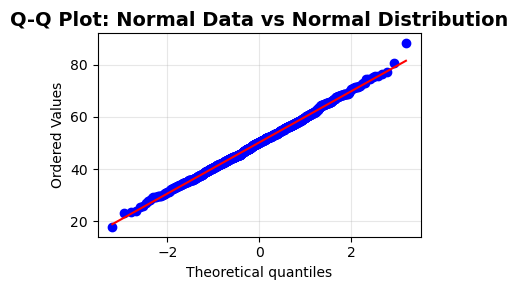

Mean: 50.19
Std Dev: 9.79

Interpretation: Points fall along a straight line → data is normally distributed!


In [2]:
# Generate normally distributed data
normal_data = np.random.normal(loc=50, scale=10, size=1000)

# Create Q-Q plot against normal distribution
fig, ax = plt.subplots(figsize=(4, 3))
stats.probplot(normal_data, dist="norm", plot=ax)
ax.set_title("Q-Q Plot: Normal Data vs Normal Distribution", fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Mean: {np.mean(normal_data):.2f}")
print(f"Std Dev: {np.std(normal_data, ddof=1):.2f}")
print("\nInterpretation: Points fall along a straight line → data is normally distributed!")


## Example 2: Normal Data vs Wrong Distribution

What happens when we compare normally distributed data against the wrong theoretical distribution? The points will NOT fall along a straight line, revealing a mismatch.


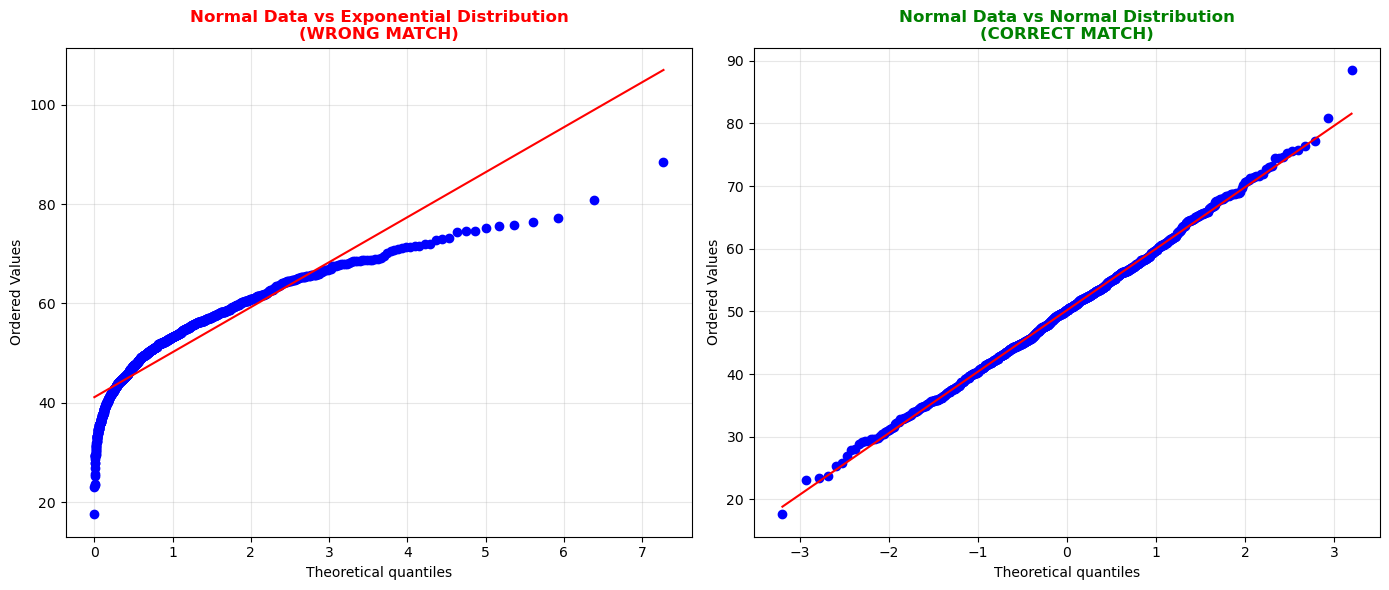

Left plot: Points curve away from the line → data is NOT exponential
Right plot: Points form a straight line → data IS normal


In [11]:
# Use the same normal data
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Q-Q plot vs Exponential (wrong distribution)
stats.probplot(normal_data, dist="expon", plot=axes[0])
axes[0].set_title("Normal Data vs Exponential Distribution\n(WRONG MATCH)", 
                  fontsize=12, fontweight='bold', color='red')
axes[0].grid(True, alpha=0.3)

# Q-Q plot vs Normal (correct distribution) for comparison
stats.probplot(normal_data, dist="norm", plot=axes[1])
axes[1].set_title("Normal Data vs Normal Distribution\n(CORRECT MATCH)", 
                  fontsize=12, fontweight='bold', color='green')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Left plot: Points curve away from the line → data is NOT exponential")
print("Right plot: Points form a straight line → data IS normal")


## Example 3: Different Distributions

Let's see Q-Q plots for different types of data distributions (exponential and log-normal).


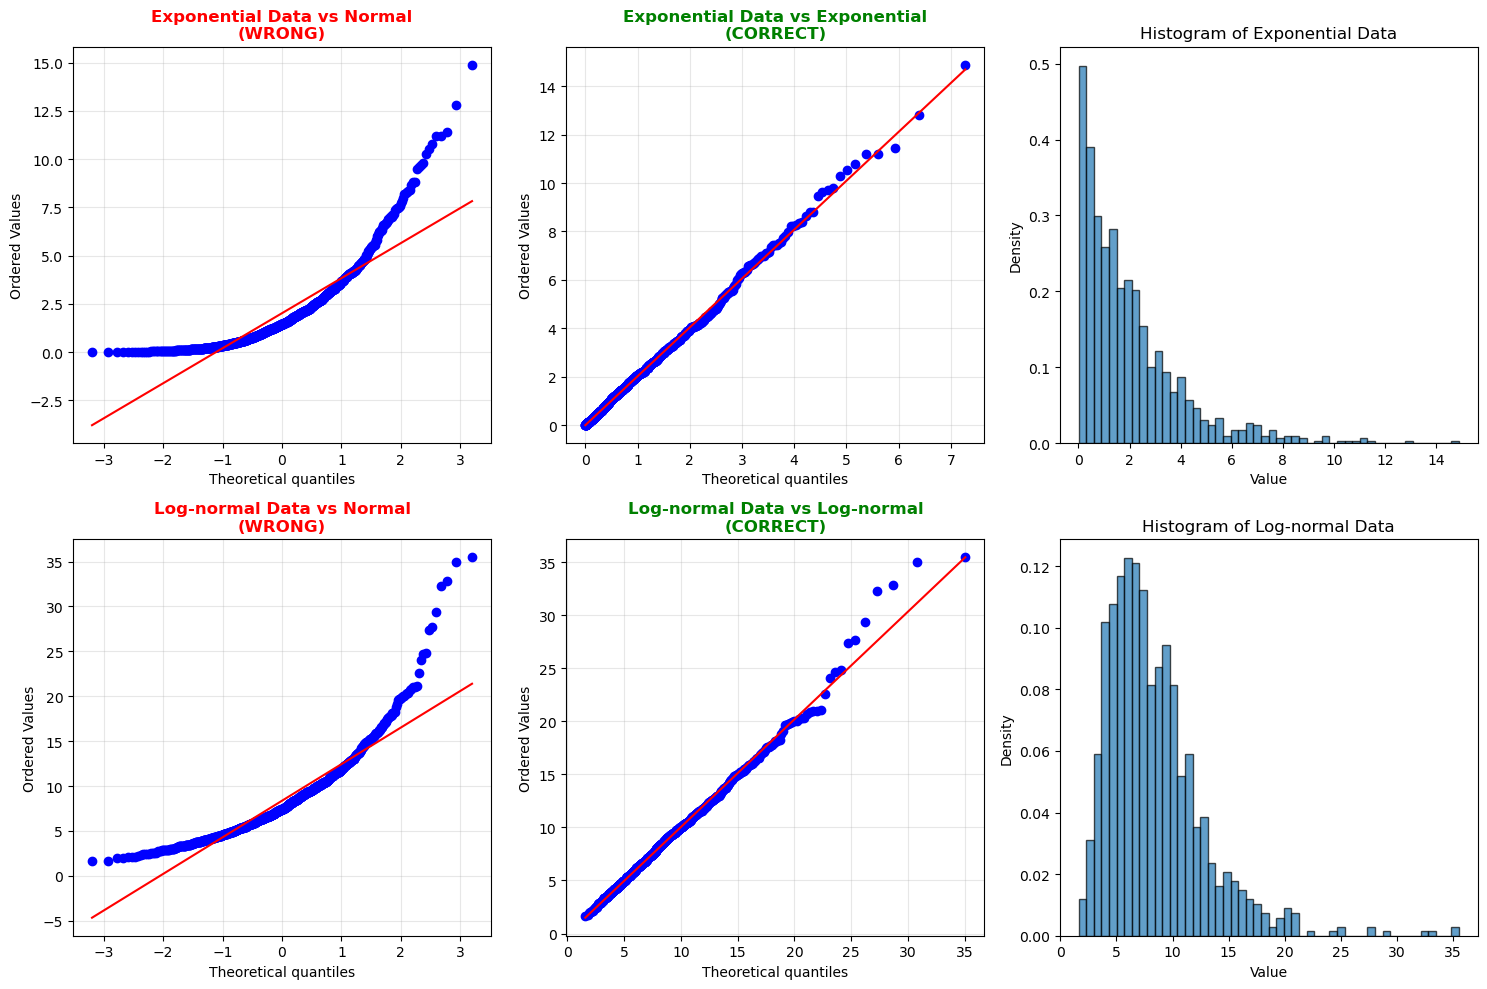

✓ All plots generated successfully!


In [12]:
# Generate data from different distributions
exponential_data = np.random.exponential(scale=2.0, size=1000)
lognormal_data = np.random.lognormal(mean=2.0, sigma=0.5, size=1000)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Exponential data - Q-Q vs Normal (wrong)
stats.probplot(exponential_data, dist="norm", plot=axes[0, 0])
axes[0, 0].set_title("Exponential Data vs Normal\n(WRONG)", fontweight='bold', color='red')
axes[0, 0].grid(True, alpha=0.3)

# Exponential data - Q-Q vs Exponential (correct)
stats.probplot(exponential_data, dist="expon", plot=axes[0, 1])
axes[0, 1].set_title("Exponential Data vs Exponential\n(CORRECT)", fontweight='bold', color='green')
axes[0, 1].grid(True, alpha=0.3)

# Histogram of exponential data
axes[0, 2].hist(exponential_data, bins=50, density=True, alpha=0.7, edgecolor='black')
axes[0, 2].set_title("Histogram of Exponential Data")
axes[0, 2].set_xlabel("Value")
axes[0, 2].set_ylabel("Density")

# Lognormal data - Q-Q vs Normal (wrong)
stats.probplot(lognormal_data, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title("Log-normal Data vs Normal\n(WRONG)", fontweight='bold', color='red')
axes[1, 0].grid(True, alpha=0.3)

# Lognormal data - Q-Q vs Log-normal (correct)
# Fit lognormal parameters first
s, loc, scale = stats.lognorm.fit(lognormal_data)
stats.probplot(lognormal_data, dist="lognorm", sparams=(s, loc, scale), plot=axes[1, 1])
axes[1, 1].set_title("Log-normal Data vs Log-normal\n(CORRECT)", fontweight='bold', color='green')
axes[1, 1].grid(True, alpha=0.3)

# Histogram of lognormal data
axes[1, 2].hist(lognormal_data, bins=50, density=True, alpha=0.7, edgecolor='black')
axes[1, 2].set_title("Histogram of Log-normal Data")
axes[1, 2].set_xlabel("Value")
axes[1, 2].set_ylabel("Density")

plt.tight_layout()
plt.show()

print("✓ All plots generated successfully!")


## Example 4: Interpreting Deviations from the Line

Understanding what different patterns in Q-Q plots tell us about our data:

- **S-shaped curve**: Data has heavier tails than the theoretical distribution
- **U-shaped curve**: Data has lighter tails (more concentrated in the middle)
- **Curved upward at ends**: Right-skewed data
- **Curved downward at ends**: Left-skewed data


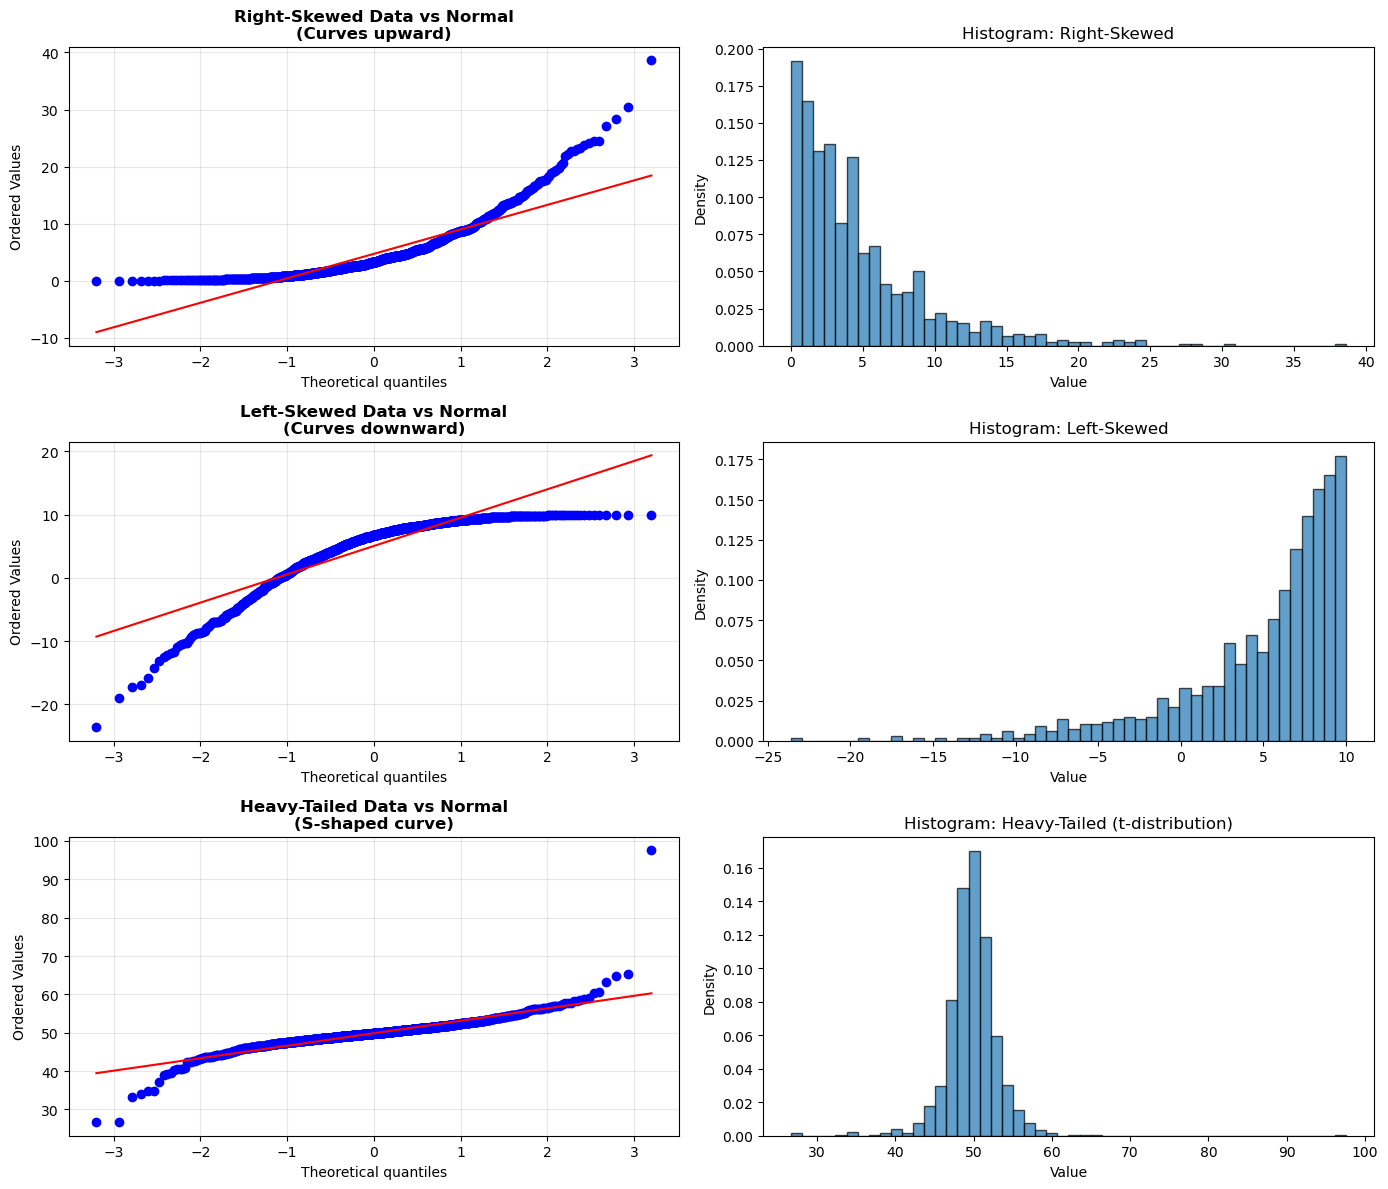

✓ Patterns demonstration complete!


In [13]:
# Generate data with different characteristics
skewed_right = np.random.exponential(scale=5, size=1000)  # Right-skewed
skewed_left = -np.random.exponential(scale=5, size=1000) + 10  # Left-skewed
heavy_tails = np.random.standard_t(df=3, size=1000) * 2 + 50  # Heavy tails (t-distribution)

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Right-skewed data
stats.probplot(skewed_right, dist="norm", plot=axes[0, 0])
axes[0, 0].set_title("Right-Skewed Data vs Normal\n(Curves upward)", fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(skewed_right, bins=50, density=True, alpha=0.7, edgecolor='black')
axes[0, 1].set_title("Histogram: Right-Skewed")
axes[0, 1].set_xlabel("Value")
axes[0, 1].set_ylabel("Density")

# Left-skewed data
stats.probplot(skewed_left, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title("Left-Skewed Data vs Normal\n(Curves downward)", fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(skewed_left, bins=50, density=True, alpha=0.7, edgecolor='black')
axes[1, 1].set_title("Histogram: Left-Skewed")
axes[1, 1].set_xlabel("Value")
axes[1, 1].set_ylabel("Density")

# Heavy-tailed data (t-distribution)
stats.probplot(heavy_tails, dist="norm", plot=axes[2, 0])
axes[2, 0].set_title("Heavy-Tailed Data vs Normal\n(S-shaped curve)", fontweight='bold')
axes[2, 0].grid(True, alpha=0.3)

axes[2, 1].hist(heavy_tails, bins=50, density=True, alpha=0.7, edgecolor='black')
axes[2, 1].set_title("Histogram: Heavy-Tailed (t-distribution)")
axes[2, 1].set_xlabel("Value")
axes[2, 1].set_ylabel("Density")

plt.tight_layout()
plt.show()

print("✓ Patterns demonstration complete!")


## Example 5: Real Weather Data - TAVG (Optional)

Let's apply Q-Q plots to real weather data to see if temperature averages follow a normal distribution.


In [14]:
# Try to load weather data (optional - works if file exists)
try:
    import dask.dataframe as dd
    DATA_PATH = '../../../weather_data/stations_weather_with_dist2coast_optimized.parquet'
    weather_data = dd.read_parquet(DATA_PATH)
    
    # Extract TAVG values - sample for efficiency
    tavg_data = weather_data[weather_data['ELEMENT'] == 'TAVG']
    day_cols = [col for col in tavg_data.columns if col.startswith('day_') and col[4:].isdigit()]
    
    if len(day_cols) > 0:
        # Sample and flatten
        tavg_sample = tavg_data[day_cols].sample(frac=0.1, random_state=42).compute()
        tavg_values = tavg_sample.values.flatten()
        tavg_values = tavg_values[~np.isnan(tavg_values)]
        
        print(f"✓ Loaded {len(tavg_values):,} TAVG values from weather data")
        print(f"  Mean: {np.mean(tavg_values):.2f}°C")
        print(f"  Std Dev: {np.std(tavg_values, ddof=1):.2f}°C")
        use_real_data = True
    else:
        raise ValueError("No day columns found")
        
except (FileNotFoundError, ImportError, ValueError, KeyError) as e:
    print(f"⚠ Weather data not available ({type(e).__name__}). Using synthetic temperature data instead.")
    # Use synthetic temperature data that mimics real temperature patterns
    tavg_values = np.random.normal(loc=15, scale=10, size=5000)
    tavg_values = tavg_values[(tavg_values > -20) & (tavg_values < 50)]  # Realistic range
    use_real_data = False


✓ Loaded 9,175,785 TAVG values from weather data
  Mean: 100.25°C
  Std Dev: 141.20°C


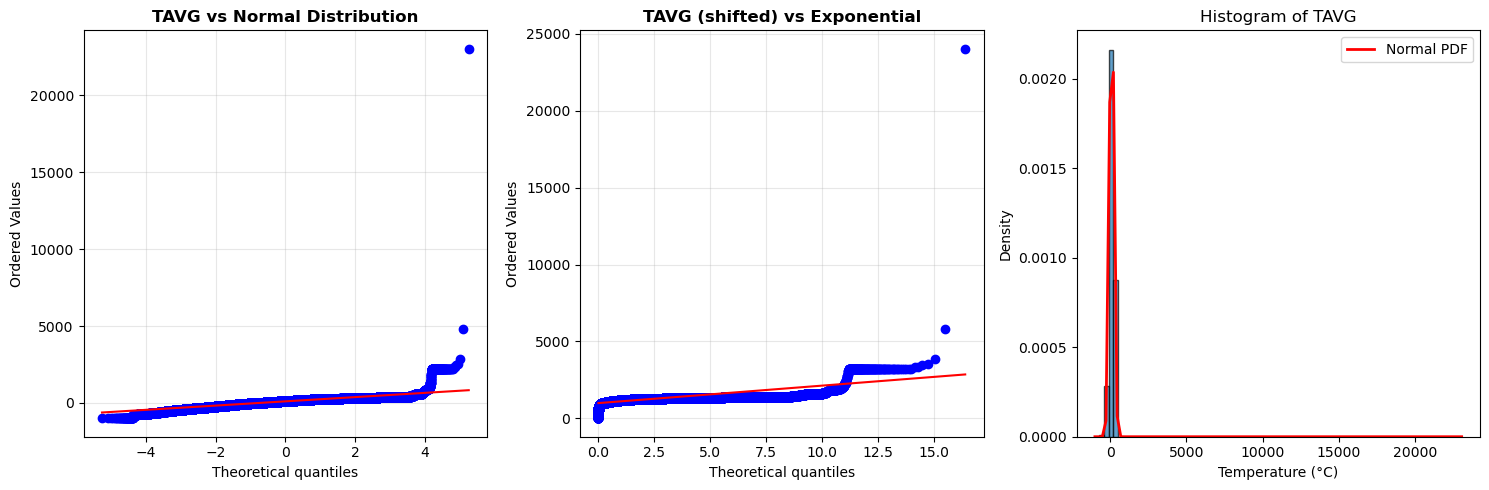


Interpretation:
If points in the first plot form a straight line, TAVG is normally distributed.
If not, the pattern tells us how it deviates from normality.


In [15]:
# Create Q-Q plots for TAVG against different distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Against normal distribution
stats.probplot(tavg_values, dist="norm", plot=axes[0])
axes[0].set_title("TAVG vs Normal Distribution", fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Against exponential (if all positive, otherwise shift)
if np.all(tavg_values > 0):
    stats.probplot(tavg_values, dist="expon", plot=axes[1])
    axes[1].set_title("TAVG vs Exponential Distribution", fontweight='bold')
else:
    # Shift data to be positive for demonstration
    shifted_values = tavg_values - np.min(tavg_values) + 1
    stats.probplot(shifted_values, dist="expon", plot=axes[1])
    axes[1].set_title("TAVG (shifted) vs Exponential", fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Histogram with normal overlay
axes[2].hist(tavg_values, bins=80, density=True, alpha=0.7, edgecolor='black')
axes[2].set_title("Histogram of TAVG")
axes[2].set_xlabel("Temperature (°C)")
axes[2].set_ylabel("Density")
# Overlay normal distribution for comparison
x = np.linspace(tavg_values.min(), tavg_values.max(), 100)
normal_pdf = stats.norm.pdf(x, loc=np.mean(tavg_values), scale=np.std(tavg_values, ddof=1))
axes[2].plot(x, normal_pdf, 'r-', linewidth=2, label='Normal PDF')
axes[2].legend()

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("If points in the first plot form a straight line, TAVG is normally distributed.")
print("If not, the pattern tells us how it deviates from normality.")


## Understanding the Q-Q Plot Components

### What Each Part Means:

1. **X-axis (Theoretical Quantiles)**: What the quantiles *should* be if your data followed the theoretical distribution
2. **Y-axis (Sample Quantiles)**: What the quantiles *actually* are in your data
3. **Red Line**: The ideal fit line - where points would fall if there was a perfect match
4. **R² Value**: Coefficient of determination - closer to 1.0 means better fit

### Common Patterns:

| Pattern | Interpretation |
|---------|---------------|
| Points on straight line | Good fit to theoretical distribution |
| S-shaped curve | Data has heavier/lighter tails than theoretical |
| Upward curve at ends | Right skew (long right tail) |
| Downward curve at ends | Left skew (long left tail) |
| Points scattered randomly | No clear distribution match |

### Statistical Test Alternative

While Q-Q plots are visual, you can also use statistical tests:
- **Shapiro-Wilk test** (for normality, small samples)
- **Kolmogorov-Smirnov test** (general distribution test)
- **Anderson-Darling test** (more sensitive to tails)


In [8]:
# Statistical test example: Shapiro-Wilk test for normality
from scipy.stats import shapiro

# Test if normal_data is normally distributed
# Note: Shapiro-Wilk works on samples up to 5000
test_size = min(5000, len(normal_data))
statistic, p_value = shapiro(normal_data[:test_size])
print(f"Normal Data:")
print(f"  Shapiro-Wilk statistic: {statistic:.4f}")
print(f"  p-value: {p_value:.6f}")
if p_value > 0.05:
    print(f"  → Cannot reject normality (p > 0.05)")
else:
    print(f"  → Reject normality (p ≤ 0.05)")

# Test if exponential_data is normally distributed
test_size2 = min(5000, len(exponential_data))
statistic2, p_value2 = shapiro(exponential_data[:test_size2])
print(f"\nExponential Data:")
print(f"  Shapiro-Wilk statistic: {statistic2:.4f}")
print(f"  p-value: {p_value2:.6f}")
if p_value2 > 0.05:
    print(f"  → Cannot reject normality (p > 0.05)")
else:
    print(f"  → Reject normality (p ≤ 0.05)")

print("\nNote: Q-Q plots provide visual assessment, while statistical tests provide")
print("quantitative measures. Both are useful for understanding your data!")


Normal Data:
  Shapiro-Wilk statistic: 0.9986
  p-value: 0.627258
  → Cannot reject normality (p > 0.05)

Exponential Data:
  Shapiro-Wilk statistic: 0.8156
  p-value: 0.000000
  → Reject normality (p ≤ 0.05)

Note: Q-Q plots provide visual assessment, while statistical tests provide
quantitative measures. Both are useful for understanding your data!


## Summary

Q-Q plots are essential tools for:

1. **Visual Assessment**: Quickly see if your data matches a theoretical distribution
2. **Pattern Recognition**: Identify skewness, heavy tails, and other distributional characteristics
3. **Model Selection**: Choose appropriate statistical models based on distributional assumptions
4. **Data Validation**: Check assumptions before applying statistical tests

### Key Takeaways:

- **Straight line** = Good fit to theoretical distribution
- **Curved line** = Distribution mismatch or data characteristics (skew, tails)
- **Always compare** against multiple distributions to find the best fit
- **Use with statistical tests** for more rigorous validation

### When to Use Q-Q Plots:

✅ Before applying parametric tests (assume normality)
✅ When choosing probability distributions for modeling
✅ For exploratory data analysis
✅ To validate model assumptions
✅ To detect outliers and distributional anomalies


## Quick Reference: How to Create Q-Q Plots

### Method 1: Using scipy.stats.probplot (Recommended)


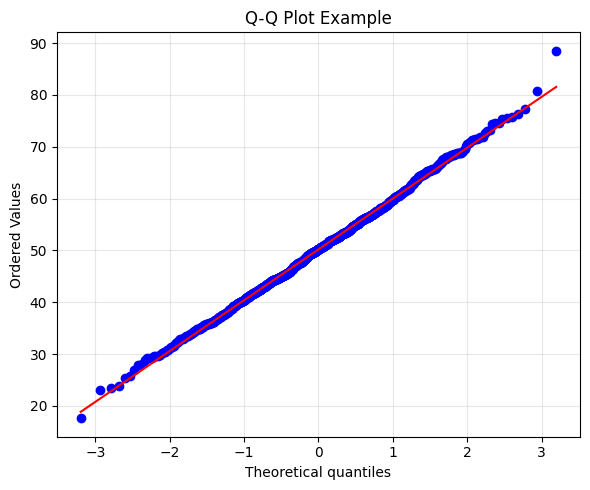

Syntax: stats.probplot(data, dist='norm', plot=ax)
  - dist: distribution name ('norm', 'expon', 'lognorm', etc.)
  - plot: matplotlib axes object
  - sparams: (optional) distribution parameters tuple


In [9]:
# Quick reference: How to create Q-Q plots in Python

# Method 1: Using scipy.stats.probplot (recommended)
fig, ax = plt.subplots(figsize=(6, 5))
stats.probplot(normal_data, dist="norm", plot=ax)
ax.set_title("Q-Q Plot Example")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Syntax: stats.probplot(data, dist='norm', plot=ax)")
print("  - dist: distribution name ('norm', 'expon', 'lognorm', etc.)")
print("  - plot: matplotlib axes object")
print("  - sparams: (optional) distribution parameters tuple")


### Method 2: Manual Calculation (For Understanding)


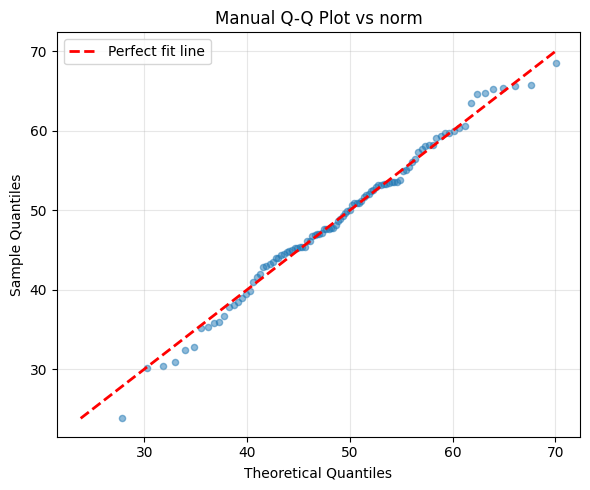

This manual version helps you understand how Q-Q plots are constructed!


In [10]:
# Method 2: Manual calculation (for educational purposes)
def manual_qq_plot(data, dist_name='norm'):
    """
    Manual Q-Q plot calculation for educational purposes.
    
    Parameters:
        data: array-like, sample data
        dist_name: str, distribution name ('norm', 'expon', etc.)
    """
    sorted_data = np.sort(data)
    n = len(sorted_data)
    # Theoretical quantiles (probabilities)
    theoretical_quantiles = np.linspace(0.01, 0.99, n)
    
    # Calculate theoretical values based on distribution
    if dist_name == 'norm':
        mean = np.mean(data)
        std = np.std(data, ddof=1)
        theoretical_values = stats.norm.ppf(theoretical_quantiles, loc=mean, scale=std)
    elif dist_name == 'expon':
        scale = np.mean(data)  # For exponential, mean = scale
        theoretical_values = stats.expon.ppf(theoretical_quantiles, scale=scale)
    else:
        raise ValueError(f"Distribution {dist_name} not implemented in manual version")
    
    # Create plot
    plt.figure(figsize=(6, 5))
    plt.scatter(theoretical_values, sorted_data, alpha=0.5, s=20)
    # Perfect fit line (y = x)
    min_val = min(theoretical_values.min(), sorted_data.min())
    max_val = max(theoretical_values.max(), sorted_data.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect fit line')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title(f'Manual Q-Q Plot vs {dist_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example of manual Q-Q plot
manual_qq_plot(normal_data[:100], 'norm')

print("This manual version helps you understand how Q-Q plots are constructed!")
